In [43]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [44]:
cv2.__version__

'3.4.4'

In [56]:
# The motto is predict the edges first and then extract ellipsis from the edges

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


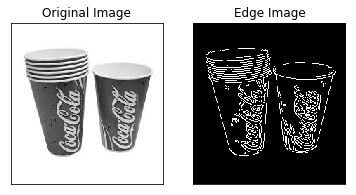

In [49]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('../images/StackedCups.jpg',0)
#print(img)
edges = cv2.Canny(img,50,150, apertureSize=3)
print(edges)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [ ]:
#Trying to detect ellipsis from the edges detected above

In [52]:
from skimage import data, color, img_as_ubyte, io
from skimage.feature import canny
from skimage.transform import hough_ellipse
from skimage.draw import ellipse_perimeter

img = cv2.imread('../images/StackedCups.jpg',0)
#print(img)

edges = cv2.Canny(img,50,150, apertureSize=3)
print(edges)

# Perform a Hough Transform
# The accuracy corresponds to the bin size of a major axis.
# The value is chosen in order to get a single high accumulator.
# The threshold eliminates low accumulators
result = hough_ellipse(edges, accuracy=40, threshold=100,
                       min_size=60, max_size=120)
result.sort(order='accumulator')
print(result)
# Estimated parameters for the ellipse
best = list(result[-1])
yc, xc, a, b = [int(round(x)) for x in best[1:5]]
orientation = best[5]

# Draw the ellipse on the original image
cy, cx = ellipse_perimeter(yc, xc, a, b, orientation)
image_rgb[cy, cx] = (0, 0, 255)
# Draw the edge (white) and the resulting ellipse (red)
edges = color.gray2rgb(img_as_ubyte(edges))
edges[cy, cx] = (250, 0, 0)

fig2, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(8, 4),
                                sharex=True, sharey=True)

ax1.set_title('Original picture')
ax1.imshow(image_rgb)

ax2.set_title('Edge (white) and result (red)')
ax2.imshow(edges)

plt.show()

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


KeyboardInterrupt: 

In [ ]:
## Trying Horizontal Lines and count the horizantal lines to equal no of cups

In [51]:
import numpy as np
import cv2

gray = cv2.imread('../images/StackedCups.jpg')
edges = cv2.Canny(gray,50,150,apertureSize = 3)
cv2.imwrite('../images/edges-50-150.jpg',edges)
minLineLength=20
lines = cv2.HoughLinesP(image=edges,rho=1,theta=np.pi/180, threshold=50,lines=np.array([]), minLineLength=minLineLength,maxLineGap=30)

#print(lines)
a,b,c = lines.shape
for i in range(a):
    cv2.line(gray, (lines[i][0][0], lines[i][0][1]), (lines[i][0][2], lines[i][0][3]), (0, 0, 255), 3, cv2.LINE_AA)
    cv2.imwrite('../images/houghlines5.jpg',gray)

In [54]:
#Trying to figure out the corners

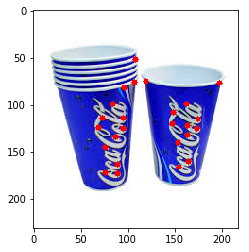

(<matplotlib.image.AxesImage at 0x2b3570207b8>, None)

In [55]:
img = cv2.imread('../images/StackedCups.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(img,(x,y),3,255,-1)

plt.imshow(img),plt.show()